<a href="https://colab.research.google.com/github/iyum/Forecast-Analysis/blob/main/Forecast_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

In [ ]:
file_path = '/content/tribunnews_pageviews.xlsx'
data = pd.read_excel(file_path)

data.head()

,Year,Month,Pageviews,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaT,tribunnews.com,youtube.com,instagram.com,facebook.com,tiktok.com,twitter.com,google search
1,2019.0,2019-01-01,134418345,61948021.5,35415204,58821064.5,4081512,9166423.5,59908500
2,2019.0,2019-02-01,119295719.25,62153655,34655402.25,58781080.5,3139197.0,9203658.75,58860000
3,2019.0,2019-03-01,133574964,61609464.75,34980367.5,57589092,3098298.0,8454534.75,59509500
4,2019.0,2019-04-01,172121097.75,61699749.75,35992620.75,57856401.75,2651838.75,10153032.75,60207000


Data cleaning

In [ ]:

data.columns = ['Year', 'Month', 'Tribunnews', 'YouTube', 'Instagram',
                'Facebook', 'TikTok', 'Twitter', 'Google_Search']

data['Month'] = pd.to_datetime(data['Month'])

data = data.drop(0)

# Reset the index
data = data.reset_index(drop=True)

# Convert the 'Year' and 'Month' columns to appropriate data types
data['Year'] = data['Year'].astype(int)
data['Month'] = pd.to_datetime(data['Month'])

# Convert pageviews columns to numeric
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.head())

   Year      Month    Tribunnews      YouTube    Instagram     Facebook  \
0  2019 2019-01-01  1.344183e+08  61948021.50  35415204.00  58821064.50   
1  2019 2019-02-01  1.192957e+08  62153655.00  34655402.25  58781080.50   
2  2019 2019-03-01  1.335750e+08  61609464.75  34980367.50  57589092.00   
3  2019 2019-04-01  1.721211e+08  61699749.75  35992620.75  57856401.75   
4  2019 2019-05-01  1.834537e+08  61529876.25  35753019.00  57456961.50   

       TikTok      Twitter  Google_Search  
0  4081512.00   9166423.50     59908500.0  
1  3139197.00   9203658.75     58860000.0  
2  3098298.00   8454534.75     59509500.0  
3  2651838.75  10153032.75     60207000.0  
4  3511629.00  10268433.00     59824500.0  


Visualize the trends from 2019 - 2023

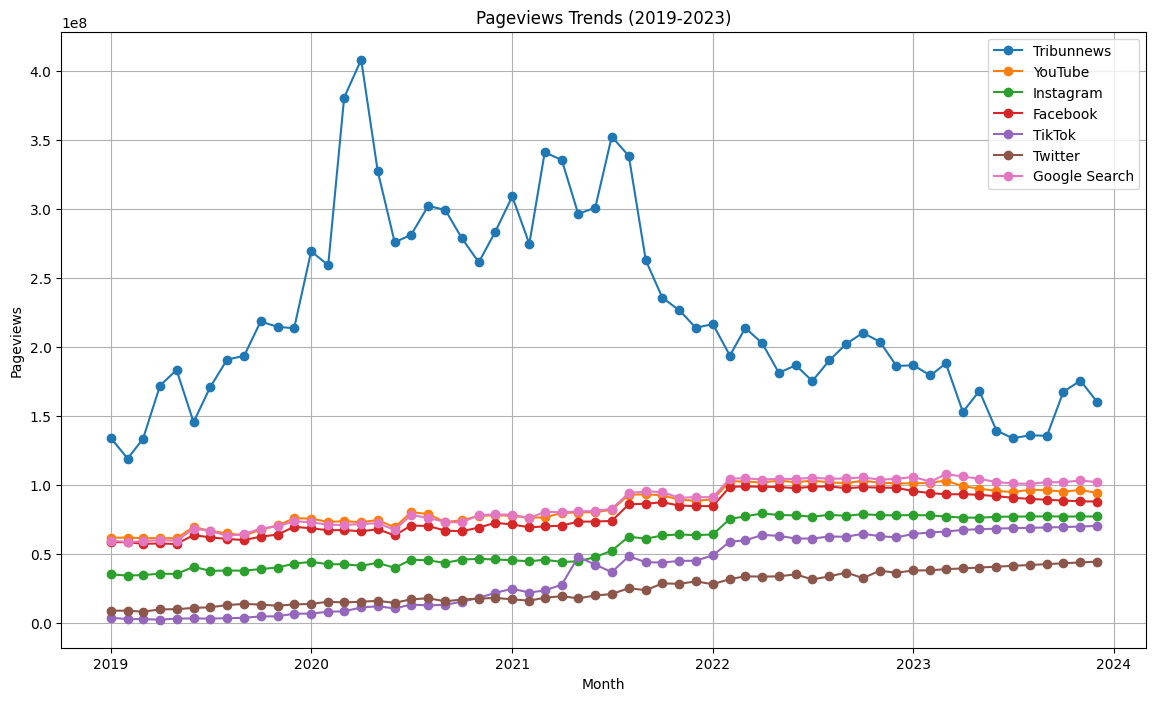

In [ ]:

# Plot the trends of pageviews
plt.figure(figsize=(14, 8))

plt.plot(data['Month'], data['Tribunnews'], label='Tribunnews', marker='o')
plt.plot(data['Month'], data['YouTube'], label='YouTube', marker='o')
plt.plot(data['Month'], data['Instagram'], label='Instagram', marker='o')
plt.plot(data['Month'], data['Facebook'], label='Facebook', marker='o')
plt.plot(data['Month'], data['TikTok'], label='TikTok', marker='o')
plt.plot(data['Month'], data['Twitter'], label='Twitter', marker='o')
plt.plot(data['Month'], data['Google_Search'], label='Google Search', marker='o')

plt.title('Pageviews Trends (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Pageviews')
plt.legend()
plt.grid(True)
plt.show()


Forecast the pageview for 2024 Using Holt-Winters Exponential Smoothing model

In [ ]:

def display_dataframe_to_user(name, dataframe):
    print(f"{name}:\n")
    print(dataframe)

forecast_2024 = {}
for platform in data.columns[2:]:
    ts_data = data.set_index('Month')[platform]

    # Apply the Holt-Winters Exponential Smoothing model
    model = ExponentialSmoothing(ts_data, trend='add', seasonal='add', seasonal_periods=12).fit()

    forecast = model.forecast(steps=12)
    forecast_2024[platform] = forecast

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast_2024)
forecast_df.index = pd.date_range(start='2024-01-01', periods=12, freq='MS')

display_dataframe_to_user(name="Forecasted Pageviews for 2024", dataframe=forecast_df)

# forecast_df()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmode

Forecasted Pageviews for 2024:

              Tribunnews       YouTube     Instagram      Facebook  \
2024-01-01  1.815745e+08  9.507957e+07  7.748371e+07  8.708656e+07   
2024-02-01  1.634925e+08  9.781332e+07  7.934649e+07  8.937667e+07   
2024-03-01  2.183005e+08  9.853320e+07  7.954951e+07  8.945309e+07   
2024-04-01  2.129413e+08  9.821406e+07  7.895177e+07  8.937987e+07   
2024-05-01  1.820617e+08  9.888047e+07  7.897300e+07  9.044683e+07   
2024-06-01  1.649667e+08  9.735409e+07  7.874687e+07  8.909164e+07   
2024-07-01  1.802764e+08  1.018518e+08  8.092219e+07  9.142206e+07   
2024-08-01  1.891897e+08  1.034969e+08  8.333503e+07  9.398630e+07   
2024-09-01  1.716189e+08  1.016619e+08  8.191235e+07  9.262091e+07   
2024-10-01  1.671865e+08  1.033055e+08  8.336863e+07  9.348463e+07   
2024-11-01  1.578448e+08  1.038402e+08  8.341179e+07  9.371329e+07   
2024-12-01  1.554040e+08  1.051892e+08  8.357481e+07  9.583499e+07   

                  TikTok       Twitter  Google_Search  
2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Visualize the Forecast

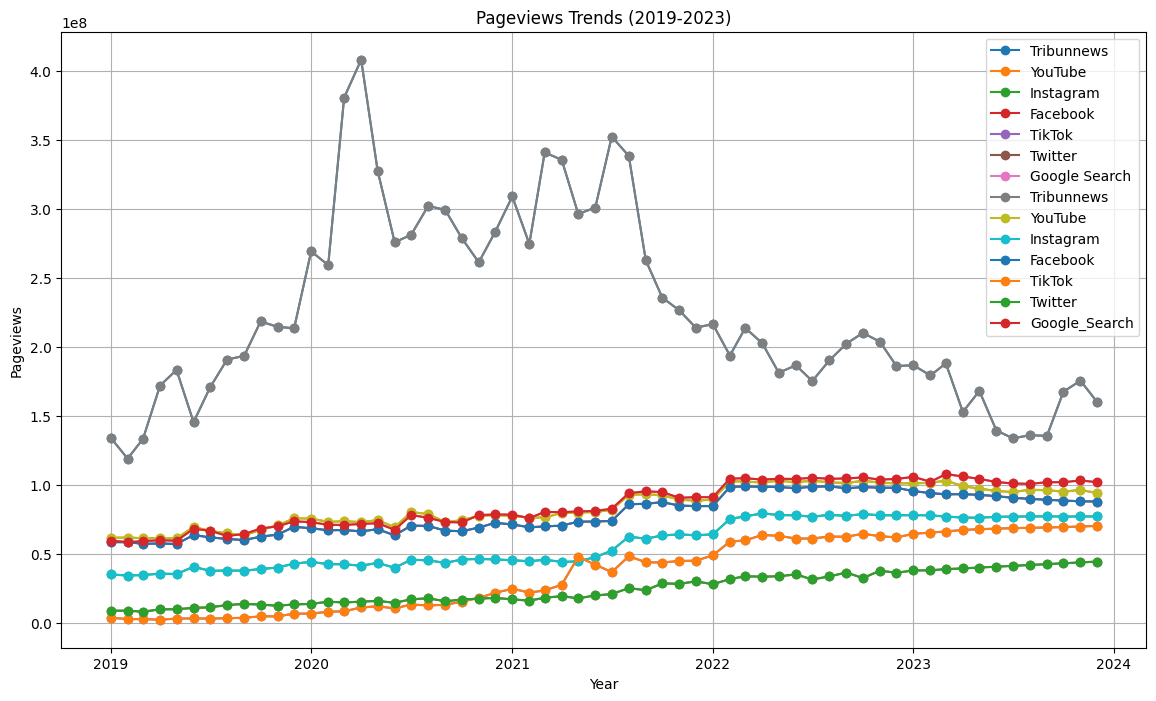

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmode

              Tribunnews       YouTube     Instagram      Facebook  \
2024-01-01  1.815745e+08  9.507957e+07  7.748371e+07  8.708656e+07   
2024-02-01  1.634925e+08  9.781332e+07  7.934649e+07  8.937667e+07   
2024-03-01  2.183005e+08  9.853320e+07  7.954951e+07  8.945309e+07   
2024-04-01  2.129413e+08  9.821406e+07  7.895177e+07  8.937987e+07   
2024-05-01  1.820617e+08  9.888047e+07  7.897300e+07  9.044683e+07   
2024-06-01  1.649667e+08  9.735409e+07  7.874687e+07  8.909164e+07   
2024-07-01  1.802764e+08  1.018518e+08  8.092219e+07  9.142206e+07   
2024-08-01  1.891897e+08  1.034969e+08  8.333503e+07  9.398630e+07   
2024-09-01  1.716189e+08  1.016619e+08  8.191235e+07  9.262091e+07   
2024-10-01  1.671865e+08  1.033055e+08  8.336863e+07  9.348463e+07   
2024-11-01  1.578448e+08  1.038402e+08  8.341179e+07  9.371329e+07   
2024-12-01  1.554040e+08  1.051892e+08  8.357481e+07  9.583499e+07   

                  TikTok       Twitter  Google_Search  
2024-01-01  7.276288e+07  4.44014

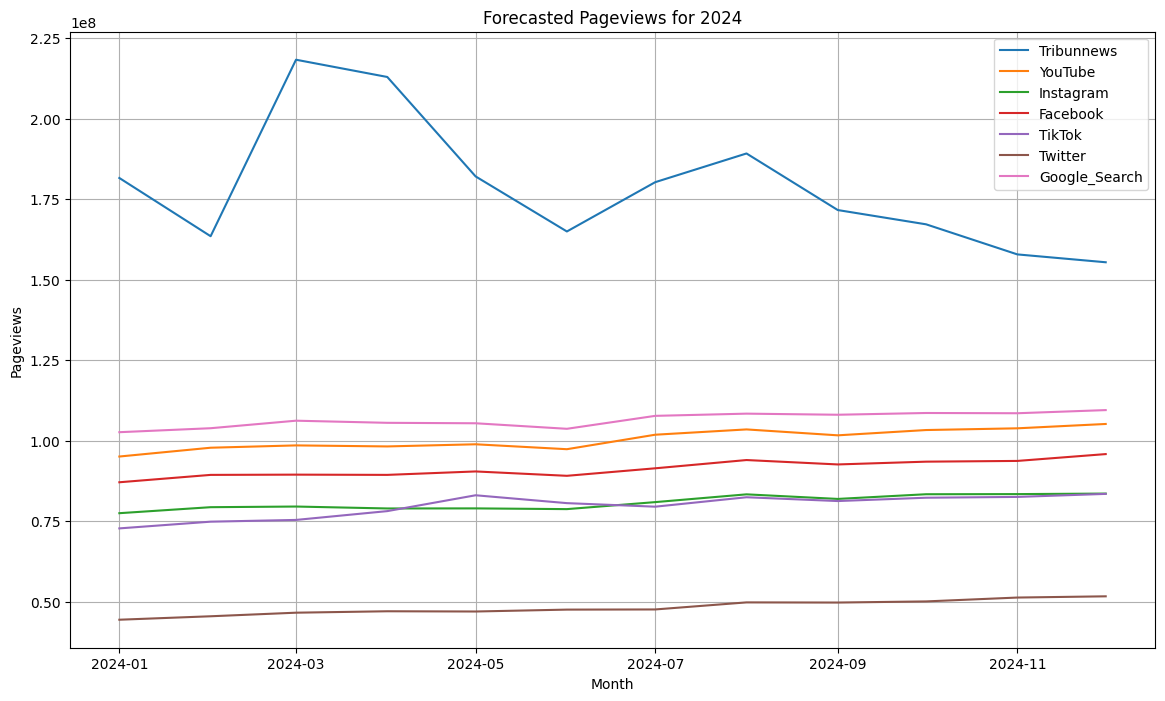

In [ ]:
plt.figure(figsize=(14, 8))

plt.plot(data['Month'], data['Tribunnews'], label='Tribunnews', marker='o')
plt.plot(data['Month'], data['YouTube'], label='YouTube', marker='o')
plt.plot(data['Month'], data['Instagram'], label='Instagram', marker='o')
plt.plot(data['Month'], data['Facebook'], label='Facebook', marker='o')
plt.plot(data['Month'], data['TikTok'], label='TikTok', marker='o')
plt.plot(data['Month'], data['Twitter'], label='Twitter', marker='o')
plt.plot(data['Month'], data['Google_Search'], label='Google Search', marker='o')

for platform in data.columns[2:]:
    plt.plot(data['Month'], data[platform], label=platform, marker ='o')

plt.title('Pageviews Trends (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Pageviews')
plt.legend()
plt.grid(True)
plt.show()

# Forecast the pageviews for 2024
forecast_2024 = {}

# Perform forecasting for each platform
for platform in data.columns[2:]:
    ts_data = data.set_index('Month')[platform]
    model = ExponentialSmoothing(ts_data, trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast = model.forecast(steps=12)
    forecast_2024[platform] = forecast

# Convert the forecast dictionary to a DataFrame
forecast_df = pd.DataFrame(forecast_2024)
forecast_df.index = pd.date_range(start='2024-01-01', periods=12, freq='MS')

# Display the forecasted values for 2024
print(forecast_df)

# Save the forecasted data to a new Excel file (optional)
forecast_df.to_excel('forecasted_pageviews_2024.xlsx', index=True)

# Visualize the forecasted data
plt.figure(figsize=(14, 8))

for platform in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[platform], label=platform)

plt.title('Forecasted Pageviews for 2024')
plt.xlabel('Month')
plt.ylabel('Pageviews')
plt.legend()
plt.grid(True)
plt.show()